In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sklearn.datasets

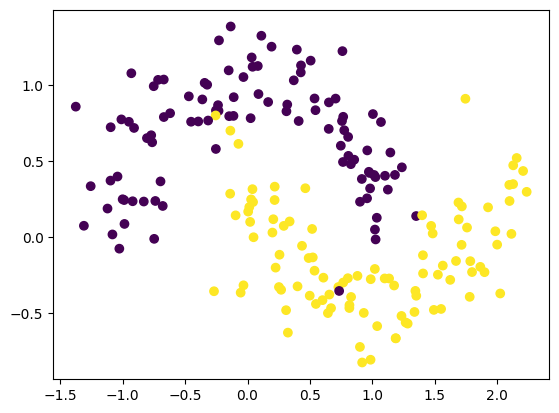

In [2]:
x,y = sklearn.datasets.make_moons(200,noise=0.20)
plt.scatter(x[:,0],x[:,1],c=y)

In [3]:
print(x.shape,y.shape)

(200, 2) (200,)


In [4]:
input_neurons = 2
output_neurons = 1
samples = x.shape[0]
learning_rate = 0.001
lambda_reg = 0.01

we are going to build a simple neural network with 2 input, 3 hidden and 2 output neurons !!

our weight matrix is just a matrix with no. of rows as the no. of neurons in it's previous layer
and no. of columns as the no. of neurons in the layer after it !!

so we are multiplying a 200x2 matrix with 2x3 matrix which will result in 200x3 matrix (which is the input for next layer)
now, 200x3 matrix in multiplied by weight matrix between second and third layer i.e. 3x2 matrix so it finally becomes 200x2 
matrix which is our output matrix

In [5]:
model_dict = {}
def retrieve(md) :
    w1 = md["w1"]
    w2 = md["w2"]
    b1 = md["b1"]
    b2 = md["b2"]
    return w1,b1,w2,b2

In [20]:
def forward(x,model_dict) : 
    w1,b1,w2,b2 = retrieve(model_dict)
    z1 = x.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    exp = np.exp(z2)
    softmax = exp/np.sum(exp,axis=1,keepdims=True)
    return z1,a1,softmax

In [21]:
def loss(softmax,y) : 
    w1,b1,w2,b2 = retrieve(model_dict)
    m = np.zeros(y.shape[0])
    for i,correct_index in enumerate(y) : 
        predicted = softmax[i][correct_index]
        m[i] = predicted
    log_prob = -np.log(predicted)
    loss = -np.sum(log_prob)
    reg_loss = (lambda_reg/2)*(np.sum(w1*w1) + np.sum(w2*w2))
    loss += reg_loss
    return (loss/y.shape[0]).float()

In [22]:
def predict(x,model_dict) : 
    w1,b1,w2,b2 = retrieve(model_dict)
    z1 = x.dot(w1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(w2) + b2
    a2 = np.tanh(z2)
    exp = np.exp(a2)
    softmax = exp/np.sum(exp,dim=1,keepdims=True)
    return np.argmax(softmax,axis=1)

In [23]:
def backprop(x,y,model_dict,epochs) : 
    for e in range(epochs) :
        w1,b1,w2,b2 = retrieve(model_dict)
        z1,a1,probs = forward(x,model_dict)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]),y] -= 1 # delta3 = probs - 1 while preserving probs !!
        dW2 = (a1.T).dot(delta3) # a1:(3,200) dot delta3:(200,2) ---> (3,2) !!
        db2 = np.sum(delta3, axis = 0, keepdims=True)
        delta2 = delta3.dot(w2.T)*(1-np.power(np.tanh(z1),2))
        dw1 = np.dot(x.T,delta2)
        db1 = np.sum(delta2, axis=0)
        # adding regularization terms 
        dw2 += lambda_reg*np.sum(w2)
        dw1 += lambda_reg*np.sum(w1)
        w1 += -learning_rate*dw1
        w2 += -learning_rate*dw2
        # update model dict !
        model_dict = {"w1" : w1, "b1" : b1, "w2" : w2, "b2" : b2}
        # print loss every 50 epoch !
        if e%50 == 0 :
            print(f"loss at {e}/{epochs} epoch is : {loss(probs,y,model_dict):.3f}")
    return model_dict 

In [24]:
def init_network(input_dim,hidden_dim,output_dim) :
    model = {}
    # Xavier initialization !
    w1 = np.random.randn(input_dim,hidden_dim)/np.sqrt(input_dim)
    b1 = np.zeros((1,hidden_dim))
    w2 = np.random.randn(hidden_dim,output_dim)/np.sqrt(input_dim)
    b2 = np.zeros((1,output_dim))
    model["w1"] = w1
    model["w2"] = w2
    model["b1"] = b1
    model["b2"] = b2
    return model

In [25]:
model_dict = init_network(input_dim=input_neurons,hidden_dim=3,output_dim=output_neurons)
model = backprop(x,y,model_dict,1500)

IndexError: index 1 is out of bounds for axis 1 with size 1